## Random Forest Intuition - Essentially a group/team of decision trees

**Ensemble Learning**: Example models include Random Forest, Gradient Boosting, etc. EL is when you take multiple algorithms, or the same algorithm multiple times, and put them together to make something more powerful. These algorithms are more stable because any changes in your dataset could impact one tree, but won't impact a forest model. 

Ex. Counting the number of balloons in a net: Essentially you're averaging out across multiple guesses, so you'll more probable to get closer to the answer

Steps:
1. Pick at random K data points from the Training set.
2. Build a decision tree associated to these K data points.
3. Choose the number (Ntree) of trees you want to build and repeat steps 1 & 2. 
4. For a new data point, make each one of your Ntree trees predict the value of Y for the data point in question, and assign the new data point the average across **all** of the predicted Y values. Instead of getting one prediction, you're getting multiple (at least 500 trees is usually the default).

## Detailed description of how Random Forest works

Example: Take level = 4. 10 votes were made each tree. Each vote corresponds to a prediction of the level 4 salary made by each tree. Then the random forest takes the average of all the level 4 predictions (10 total), and this average is nothing else than the prediction of the level 4 salary made by the random forest itself. And so we get more steps because the whole range of levels is split into more intervals and that is because the random forest is calculating many different averages of its decision tree predictions in each of these intervals. 

**Important** to note: If we add more trees to our random forest, it does **not** mean that we get more steps. The more you add trees, the more the average of these votes will converge to some certain average (convergence). Perhaps though, the steps were better chosen so it could impact the prediction (with 10, y_pred = 167K, with 100, y_pred = 158K, with 300, y_pred = 160K!). Remember the hire said he made 160K.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

os.getcwd()
os.chdir("/Users/gaylonalfano/Documents/Python/Machine Learning A-Z/Part 2 - Regression/Section 9 - Random Forest Regression")

In [3]:
# Importing the dataset
# Handy tip: X must be a DF/Matrix, not a Series/Vector
# Therefore use .iloc[:, 1:2] instead of [:, 1]
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values

In [4]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [5]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [ ]:
# Splitting the dataset ino the Training set and Test set
"""from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling -- NOT needed this time
# Polynomial regression just consists of adding PNR terms
# into the MLR equation, so we will use the same LinearRegression
# library that we used for SLR and MLR, which is the library
# that does feature scaling itself, so not needed.
# Ready to move on to the next step.
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

In [13]:
# Fitting the Random Forest Regression model to the dataset
# This template is for non-linear regression models
# Therefore, will not create a LR object.
# mse = Mean Squared Error - Sum of squared differences between prediction and actual results.
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, criterion = 'mse', random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [15]:
# Predicting the Random Forest Regression results. Got rid of the LR objects (lin_reg, poly_reg, etc.)
# With single Decision Tree and w/o FS, y_pred = 150k
# With n_estimators = 10 and w/o FS, y_pred = 167K
# With '' = 100, 158K; With 300 = 160K. Bullseye!
y_pred = regressor.predict(6.5) # Level of hire was 6.5

In [16]:
y_pred

array([160333.33333333])

In [ ]:
"""# Visualizing the Decision Tree Regression model results
# This is a TRAP! It's taking the average of each interval. It should
# be an average constant. The problem is in our regression template!
# It's only plotting the 10 salaries on the 10 levels/increments.
# This is a non-continuous regression model.
plt.style.use(style = 'ggplot')
plt.scatter(x = X, y = y, color = 'red') 
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title("Truth or Bluff (Decision Tree Regression Model)") 
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()"""

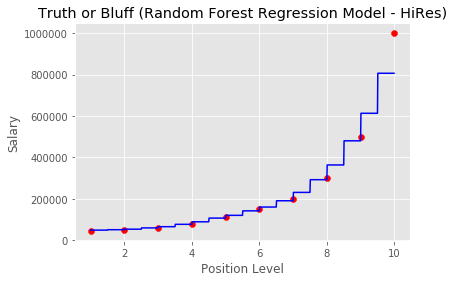

In [14]:
# Visualizing the Random Forest Regression model results (higher resolution/smoother curve)
# Since this is a non-continuous model, technically should have true vertical
# lines (steps/ladder), therefore need to make the resolution even higher
# by incrementing by an even smaller amount.

# Based on the entropy in the information gained, it splits the whole range
# of independent variable into different intervals. It takes the avg within
# each interval. In this case, we only have a few data points. 
X_grid = np.arange(min(X), max(X), step = 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.style.use(style = 'ggplot')
plt.scatter(x = X, y = y, color = 'red') 
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title("Truth or Bluff (Random Forest Regression Model - HiRes)") 
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

## Detailed description of how Random Forest works

Example: Take level = 4. 10 votes were made each tree. Each vote corresponds to a prediction of the level 4 salary made by each tree. Then the random forest takes the average of all the level 4 predictions (10 total), and this average is nothing else than the prediction of the level 4 salary made by the random forest itself. And so we get more steps because the whole range of levels is split into more intervals and that is because the random forest is calculating many different averages of its decision tree predictions in each of these intervals. 

**Important** to note: If we add more trees to our random forest, it does **not** mean that we get more steps. The more you add trees, the more the average of these votes will converge to some certain average (convergence). Perhaps though, the steps were better chosen so it could impact the prediction (with 10, y_pred = 167K, with 100, y_pred = 158K, with 300, y_pred = 160K!). Remember the hire said he made 160K.